In [1]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dummy_data.csv', header=None)

In [3]:
df = df.add_prefix('var_')

In [4]:
print(df)

          var_0       var_1       var_2       var_3       var_4       var_5  \
0     57.194209   77.125770  297.352394  434.303447   70.178234   28.848476   
1     56.830469   72.836958  348.114697   59.307036  633.642653  222.665790   
2     59.052274   70.070745   50.052467   58.985319  215.678071  140.351046   
3     56.741179   78.703639   49.163106   64.010534   69.686085   27.043837   
4     58.947788  379.363707   51.453109   64.414831  589.022563   25.936422   
...         ...         ...         ...         ...         ...         ...   
9995  56.213396   74.316541   50.076519   66.225106   64.422806   27.226202   
9996  57.334363   73.631775   50.926278   63.950461   68.803902   26.592461   
9997  57.464605   72.014821   49.889816   56.129316   70.134597   27.788485   
9998  55.824113   74.522174   50.570337   63.181445   67.091371   28.762165   
9999  58.912412   67.861964   50.739837   60.895974   71.025829   27.937186   

           var_6       var_7  
0     540.548734  44

In [5]:
df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,58.566946,76.494078,51.890249,63.991509,70.901020,28.767684,71.545847,63.780113
std,23.592767,32.480603,23.819829,26.089102,27.380624,11.082042,32.073184,26.147817
min,52.486766,61.485837,46.169042,50.737638,60.845171,23.820368,64.879418,49.377620
25%,56.335283,71.949278,49.340097,60.122037,67.660809,27.352407,68.322322,59.941516
50%,56.990249,74.018240,50.012425,62.116197,69.002660,28.024901,68.993275,61.991284
75%,57.706598,76.060613,50.708158,64.128985,70.360768,28.694712,69.683255,64.039499
max,533.023894,696.643368,462.363145,599.093346,643.465371,256.844167,632.818594,610.472302


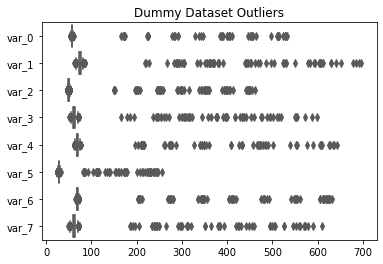

In [6]:
ax1 = sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Dummy Dataset Outliers')
df_ = df.copy(deep=True)

In [7]:
# Finding Threshold for Variables Outliers %
print('var_0 - outliers %: '+str(df_[(df_['var_0'] > 166)].shape[0])+'/10,000')
print('var_1 - outliers %: '+str(df_[(df_['var_1'] > 217)].shape[0])+'/10,000')
print('var_2 - outliers %: '+str(df_[(df_['var_2'] > 149)].shape[0])+'/10,000')
print('var_3 - outliers %: '+str(df_[(df_['var_3'] > 166)].shape[0])+'/10,000')
print('var_4 - outliers %: '+str(df_[(df_['var_4'] > 197)].shape[0])+'/10,000')
print('var_5 - outliers %: '+str(df_[(df_['var_5'] > 81)].shape[0])+'/10,000')
print('var_6 - outliers %: '+str(df_[(df_['var_6'] > 202)].shape[0])+'/10,000')
print('var_7 - outliers %: '+str(df_[(df_['var_7'] > 184)].shape[0])+'/10,000')

var_0 - outliers %: 50/10,000
var_1 - outliers %: 67/10,000
var_2 - outliers %: 69/10,000
var_3 - outliers %: 60/10,000
var_4 - outliers %: 57/10,000
var_5 - outliers %: 54/10,000
var_6 - outliers %: 75/10,000
var_7 - outliers %: 57/10,000


In [8]:
# Finding the Anomalous Samples in Dummy Dataset (*considering 37.5% of anomaly in every sample)
var0_a = df_[(df_['var_0'] > 166)].index.tolist()
var1_a = df_[(df_['var_1'] > 217)].index.tolist()
var2_a = df_[(df_['var_2'] > 149)].index.tolist()
var3_a = df_[(df_['var_3'] > 166)].index.tolist()
var4_a = df_[(df_['var_4'] > 197)].index.tolist()
var5_a = df_[(df_['var_5'] > 81)].index.tolist()
var6_a = df_[(df_['var_6'] > 202)].index.tolist()
var7_a = df_[(df_['var_7'] > 184)].index.tolist()

outliers = var0_a + var1_a + var2_a + var3_a + var4_a + var5_a + var6_a + var7_a
anomalies = {x:outliers.count(x) for x in outliers}
anomalies = {k: v for k, v in sorted(anomalies.items(), key=lambda item: item[1], reverse=True)}
anomalies = {k: v for k, v in anomalies.items() if v > 2}
print(anomalies)

{14: 6, 31: 6, 183: 6, 30: 5, 32: 5, 135: 5, 168: 5, 185: 5, 17: 5, 76: 5, 129: 5, 196: 5, 55: 5, 43: 4, 44: 4, 61: 4, 77: 4, 88: 4, 119: 4, 126: 4, 130: 4, 139: 4, 159: 4, 174: 4, 177: 4, 15: 4, 110: 4, 117: 4, 138: 4, 144: 4, 188: 4, 0: 4, 10: 4, 64: 4, 95: 4, 164: 4, 170: 4, 172: 4, 176: 4, 143: 4, 13: 3, 24: 3, 37: 3, 46: 3, 63: 3, 66: 3, 75: 3, 78: 3, 84: 3, 90: 3, 116: 3, 140: 3, 151: 3, 165: 3, 181: 3, 184: 3, 199: 3, 4: 3, 27: 3, 40: 3, 41: 3, 50: 3, 51: 3, 68: 3, 72: 3, 87: 3, 93: 3, 131: 3, 134: 3, 145: 3, 148: 3, 153: 3, 1: 3, 5: 3, 28: 3, 39: 3, 58: 3, 65: 3, 74: 3, 111: 3, 125: 3, 157: 3, 158: 3, 191: 3, 192: 3, 18: 3, 60: 3, 112: 3, 137: 3, 2: 3, 122: 3, 146: 3}


In [9]:
# Labeling Anomalous Samples
df['normal'] = 1
df.loc[list(anomalies.keys()), 'normal'] = 0
df['normal']

0       0
1       0
2       0
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: normal, Length: 10000, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
y = df['normal']
df.drop(columns = 'normal',inplace=True)

In [11]:
X = df

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)   
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [15]:
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: normal, Length: 10000, dtype: int64

In [16]:
y_train

8208    1
6352    1
4       0
1547    1
3995    1
       ..
9648    1
6343    1
2149    1
7848    1
331     1
Name: normal, Length: 6700, dtype: int64

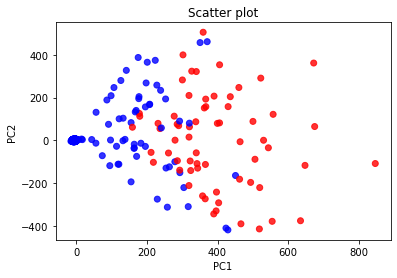

In [17]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()

colormap = np.array(['r', 'b'])

plt.scatter(x_pca['PC1'], x_pca['PC2'], alpha=0.8, c=colormap[y_train]) 
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [18]:
x_pca.shape

(6700, 2)

In [19]:
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder


In [20]:
clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
clf1.fit(X_train_scaled)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 25)                225       
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 5

189/189 [==============================] - 1s 3ms/step - loss: 1.0302 - val_loss: 0.7429
Epoch 61/100
189/189 [==============================] - 1s 3ms/step - loss: 1.0302 - val_loss: 0.7428
Epoch 62/100
189/189 [==============================] - 1s 3ms/step - loss: 1.0301 - val_loss: 0.7427
Epoch 63/100
189/189 [==============================] - 0s 2ms/step - loss: 1.0300 - val_loss: 0.7427
Epoch 64/100
189/189 [==============================] - 0s 2ms/step - loss: 1.0300 - val_loss: 0.7426
Epoch 65/100
189/189 [==============================] - 0s 2ms/step - loss: 1.0299 - val_loss: 0.7425
Epoch 66/100
189/189 [==============================] - 0s 2ms/step - loss: 1.0299 - val_loss: 0.7425
Epoch 67/100
189/189 [==============================] - 0s 2ms/step - loss: 1.0298 - val_loss: 0.7424
Epoch 68/100
189/189 [==============================] - 0s 2ms/step - loss: 1.0298 - val_loss: 0.7423
Epoch 69/100
189/189 [==============================] - 0s 2ms/step - loss: 1.0297 - val_loss: 

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x000001DAA4311E50>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [21]:
y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(X_test_scaled)  
# outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf1.decision_function(X_test_scaled)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

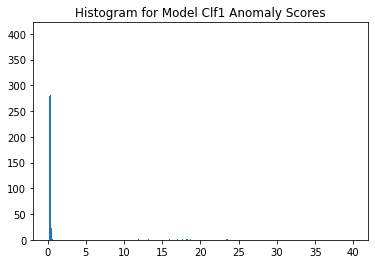

In [22]:
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [23]:
df_test = X_test_scaled.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<2, 0, 1)
df_test['cluster'].value_counts()

df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,score
cluster,,,,,,,,,
0,-0.068737,-0.077806,-0.081110,-0.066916,-0.069715,-0.072835,-0.077105,-0.063661,0.326519
1,2.635093,3.867536,3.325257,3.820034,2.270016,3.410472,4.381997,4.502812,18.529181


In [24]:
df_test['cluster'].value_counts()

0    3236
1      64
Name: cluster, dtype: int64

In [ ]:
### Cluster 1: Outliers

In [25]:
clf2 = AutoEncoder(hidden_neurons =[25, 10,2, 10, 25])
clf2.fit(X_train_scaled)

# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(X_test_scaled)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 25)                225       
                                                                 
 dropout_8 (Dropout)         (None, 25)                0         
                                                                 
 dense_10 (Dense)            (None, 10)               

189/189 [==============================] - 0s 2ms/step - loss: 0.9170 - val_loss: 1.1219
Epoch 58/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9164 - val_loss: 1.1238
Epoch 59/100
189/189 [==============================] - 1s 3ms/step - loss: 0.9157 - val_loss: 1.1243
Epoch 60/100
189/189 [==============================] - 1s 4ms/step - loss: 0.9112 - val_loss: 1.1284
Epoch 61/100
189/189 [==============================] - 1s 4ms/step - loss: 0.9153 - val_loss: 1.1333
Epoch 62/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9144 - val_loss: 1.1213
Epoch 63/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9098 - val_loss: 1.1441
Epoch 64/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9157 - val_loss: 1.1227
Epoch 65/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9136 - val_loss: 1.1271
Epoch 66/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9064 - val_loss: 

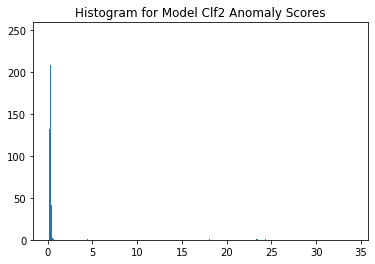

In [26]:
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

In [27]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<1, 0, 1)
df_test['cluster'].value_counts()

1    2244
0    1056
Name: cluster, dtype: int64

In [28]:
df_test.groupby('cluster').mean()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,score
cluster,,,,,,,,,
0,61.101396,81.718761,55.112342,68.391958,73.321948,30.355305,77.585822,68.919933,0.311207
1,56.973296,73.994844,50.008677,62.139981,69.047047,27.963167,68.997888,61.967403,19.060786


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dropout_14 (Dropout)        (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 25)                225       
                                                                 
 dropout_15 (Dropout)        (None, 25)                0         
                                                                 
 dense_18 (Dense)            (None, 15)               

189/189 [==============================] - 0s 2ms/step - loss: 0.9912 - val_loss: 0.7326
Epoch 53/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9969 - val_loss: 0.7336
Epoch 54/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9878 - val_loss: 0.7337
Epoch 55/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9954 - val_loss: 0.7355
Epoch 56/100
189/189 [==============================] - 1s 4ms/step - loss: 0.9844 - val_loss: 0.7486
Epoch 57/100
189/189 [==============================] - 1s 4ms/step - loss: 0.9912 - val_loss: 0.7298
Epoch 58/100
189/189 [==============================] - 1s 4ms/step - loss: 0.9866 - val_loss: 0.7297
Epoch 59/100
189/189 [==============================] - 1s 4ms/step - loss: 0.9894 - val_loss: 0.7260
Epoch 60/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9925 - val_loss: 0.7268
Epoch 61/100
189/189 [==============================] - 0s 2ms/step - loss: 0.9827 - val_loss: 

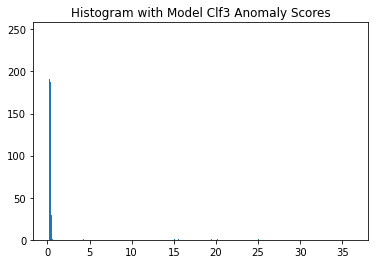

,0,1,2,3,4,5,6,7,score
cluster,,,,,,,,,
0,-0.068737,-0.077806,-0.081110,-0.066916,-0.069715,-0.072835,-0.077105,-0.063661,0.318976
1,2.635093,3.867536,3.325257,3.820034,2.270016,3.410472,4.381997,4.502812,17.687139


In [29]:
clf3 = AutoEncoder(hidden_neurons =[25, 15, 10, 2, 10,15, 25])
clf3.fit(X_train_scaled)

# clf.decision_function: Predict raw anomaly score of X using the fitted detector.  
y_test_scores = clf3.decision_function(X_test_scaled)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram with Model Clf3 Anomaly Scores")
plt.show()

df_test = X_test_scaled.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<1, 0, 1)
df_test['cluster'].value_counts()

df_test.groupby('cluster').mean()

In [30]:
!pip install combo

In [31]:
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test_scaled),
                             'clf2': clf2.decision_function(X_test_scaled),
                             'clf3': clf3.decision_function(X_test_scaled) 
                            })

In [32]:
train_scores.head()

,clf1,clf2,clf3
0,0.352916,0.333330,0.343614
1,0.309659,0.292448,0.300676
2,20.768456,19.351458,20.774280
3,0.331956,0.316466,0.325907
4,0.353715,0.339063,0.345399


In [33]:
test_scores.head()

,clf1,clf2,clf3
0,0.399554,0.382959,0.391717
1,0.446287,0.428848,0.439391
2,0.225446,0.218457,0.219863
3,0.192822,0.181875,0.186898
4,0.225473,0.210516,0.216720


In [34]:
from pyod.utils.utility import standardizer
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [35]:
train_scores_norm.shape

(6700, 3)

In [36]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([-0.08590525, -0.16784941, -0.18073438, -0.16927298, -0.13719988,
       -0.15896922, -0.15646815, -0.1430323 , -0.16089987])

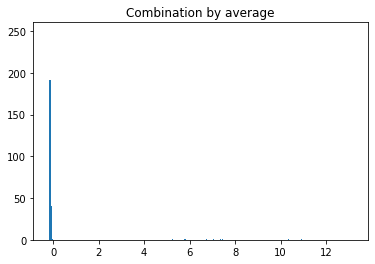

In [37]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [38]:
df_test = pd.DataFrame(X_test_scaled)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<0, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    3234
1      66
Name: y_by_average_cluster, dtype: int64

In [39]:
df_test.groupby('y_by_average_cluster').mean()

,0,1,2,3,4,5,6,7,y_by_average_score
y_by_average_cluster,,,,,,,,,
0,-0.068722,-0.077613,-0.081124,-0.066945,-0.069737,-0.072828,-0.077101,-0.063405,-0.131154
1,2.552407,3.738531,3.222702,3.703671,2.200193,3.304582,4.246686,4.351899,6.306413


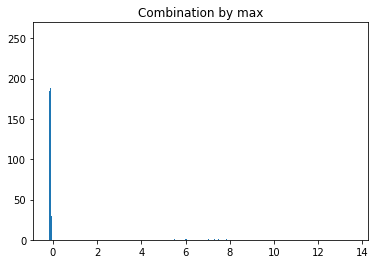

In [40]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

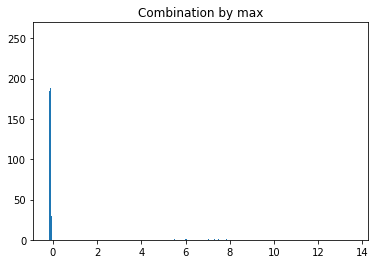

In [41]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

In [42]:
df_test = X_test_scaled.copy()
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<0, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    3234
1      66
Name: y_by_maximization_cluster, dtype: int64

In [43]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,4,5,6,7,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,
0,-0.068722,-0.077613,-0.081124,-0.066945,-0.069737,-0.072828,-0.077101,-0.063405,-0.131154,0.0,-0.130276
1,2.552407,3.738531,3.222702,3.703671,2.200193,3.304582,4.246686,4.351899,6.306413,1.0,6.428083
